Importing the Libraries

## https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.shape

(2290, 6)

In [4]:
# gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# print(gold_data.to_string())


In [5]:
gold_data.head(60)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


## rounding the values upto to decimal points

In [6]:
gold_data['SPX'] = gold_data['SPX'].round(2)
gold_data['GLD'] = gold_data['GLD'].round(2)
gold_data['USO'] = gold_data['USO'].round(2)
gold_data['EUR/USD'] = gold_data['EUR/USD'].round(2)
gold_data['SLV'] = gold_data['SLV'].round(2)


In [7]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.16,84.86,78.47,15.18,1.47
1,1/3/2008,1447.16,85.57,78.37,15.28,1.47
2,1/4/2008,1411.63,85.13,77.31,15.17,1.48
3,1/7/2008,1416.18,84.77,75.50,15.05,1.47
4,1/8/2008,1390.19,86.78,76.06,15.59,1.56


In [8]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.92,124.59,14.06,15.51,1.19
2286,5/9/2018,2697.79,124.33,14.37,15.53,1.18
2287,5/10/2018,2723.07,125.18,14.41,15.74,1.19
2288,5/14/2018,2730.13,124.49,14.38,15.56,1.19
2289,5/16/2018,2725.78,122.54,14.41,15.45,1.18


In [9]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [10]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315777,122.732873,31.842223,20.084991,1.283633
std,519.111540,23.283346,19.523515,7.092573,0.131609
min,676.530000,70.000000,7.960000,8.850000,1.040000
25%,1239.875000,109.725000,14.380000,15.570000,1.170000
50%,1551.435000,120.580000,33.870000,17.270000,1.300000
75%,2073.010000,132.840000,37.827500,22.882500,1.370000
max,2872.870000,184.590000,117.480000,47.260000,1.600000


Correlation:
1. Positive Correlation
2. Negative Correlation

In [13]:
correlation = gold_data.corr()

<AxesSubplot:>

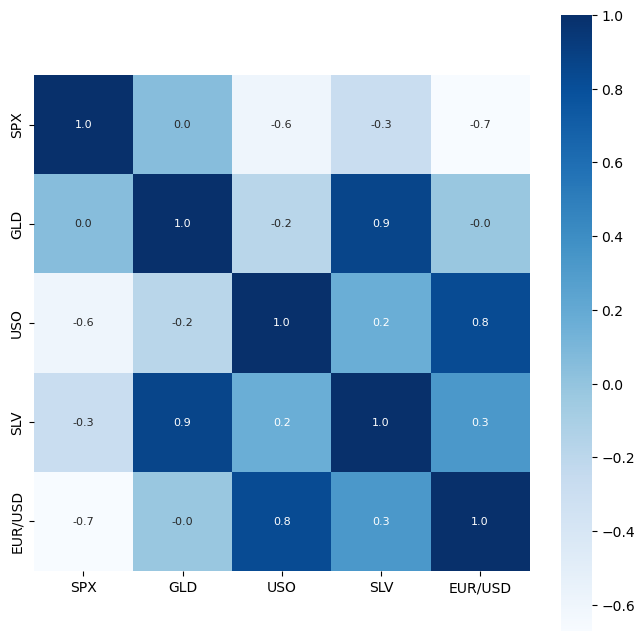

In [14]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

#try the below one also
# sns.heatmap(correlation, cbar=False, square=False, fmt='.2f',annot=False, annot_kws={'size':8}, cmap='Blues')

In [15]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.023757
Name: GLD, dtype: float64


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

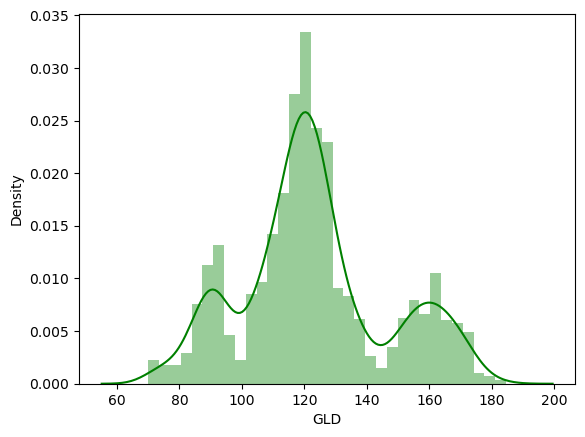

In [16]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [17]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [18]:
X

,SPX,USO,SLV,EUR/USD
0,1447.16,78.47,15.18,1.47
1,1447.16,78.37,15.28,1.47
2,1411.63,77.31,15.17,1.48
3,1416.18,75.50,15.05,1.47
4,1390.19,76.06,15.59,1.56
...,...,...,...,...
2285,2671.92,14.06,15.51,1.19
2286,2697.79,14.37,15.53,1.18
2287,2723.07,14.41,15.74,1.19
2288,2730.13,14.38,15.56,1.19


In [19]:
Y

0        84.86
1        85.57
2        85.13
3        84.77
4        86.78
         ...  
2285    124.59
2286    124.33
2287    125.18
2288    124.49
2289    122.54
Name: GLD, Length: 2290, dtype: float64

Splitting into Training data and Test Data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [21]:
X_train

,SPX,USO,SLV,EUR/USD
476,1138.50,39.79,16.89,1.36
1958,2202.94,10.63,15.80,1.06
248,700.82,24.48,12.77,1.26
2231,2656.00,11.89,15.57,1.23
1325,1838.88,33.04,19.42,1.37
...,...,...,...,...
1071,1409.15,32.32,32.98,1.29
433,1132.99,40.27,17.23,1.44
674,1286.12,38.61,27.39,1.36
1099,1461.89,33.92,29.18,1.31


In [22]:
Y_train

476     109.88
1958    115.54
248      90.93
2231    125.37
1325    119.89
         ...  
1071    169.61
433     109.80
674     129.87
1099    159.43
1608    115.14
Name: GLD, Length: 1832, dtype: float64

Model Training:
Random Forest Regressor

In [23]:
regressor = RandomForestRegressor(n_estimators=100)

In [24]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [25]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [26]:
with open('model.pkl', 'rb') as f:
    my_model = pickle.load(f)


In [27]:
my_model.predict([[1447.16,78.47,15.18,1.47]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([85.0916])

In [59]:
print(test_data_prediction)

[168.2378  81.7518 115.9696 127.4563 120.5895 154.6515 150.1782 126.0785
 117.3929 125.9928 116.3858 172.0449 142.4105 167.9826 115.1782 117.7341
 138.0408 170.1448 159.6125 157.8433 155.0496 124.9794 175.5722 157.5484
 125.0112  93.8216  78.2819 121.2003 119.0484 167.5488  88.1214 125.2516
  91.0624 117.5944 121.0958 136.2689 115.2769 114.8614 145.8349 107.2207
 104.5045  87.1275 126.5986 118.2472 152.5776 119.5493 108.2929 108.072
  93.1394 126.9974  74.1363 113.8535 120.9439 111.249  118.9719 120.7803
 158.6369 169.753  146.9083  85.6881  94.2546  86.7633  90.678  118.9425
 126.3516 127.9333 168.1295 122.2213 117.3352  99.0028 168.6822 142.6647
 132.2984 121.2954 121.0796 119.6823 114.4559 117.9493 107.0265 127.6889
 113.9897 108.5001 116.6762 119.6993  89.0256  88.1589 145.7515 127.8287
 113.6469 110.4597 107.9707  77.4531 168.2904 114.0695 121.9029 127.751
 154.812   91.4349 135.9869 159.2322 125.6331 125.6517 130.314  115.3096
 120.0128  92.0796 110.6434 167.7834 158.2878 114.253

In [60]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9888537633529847


In [61]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(regressor, f)


In [63]:
# 1138.50	39.79	16.89	1.36

Compare the Actual Values and Predicted Values in a Plot

In [64]:
Y_test = list(Y_test)

In [65]:
Y_test

[168.02,
 81.23,
 112.32,
 127.59,
 119.62,
 154.21,
 148.91,
 126.19,
 117.47,
 125.74,
 115.38,
 167.12,
 141.63,
 169.56,
 115.6,
 119.67,
 132.95,
 170.4,
 159.37,
 173.53,
 154.72,
 128.12,
 177.72,
 157.19,
 125.31,
 93.4,
 76.79,
 119.69,
 118.99,
 167.39,
 87.5,
 124.98,
 91.23,
 115.49,
 120.95,
 133.81,
 116.69,
 113.81,
 133.58,
 105.97,
 105.12,
 87.96,
 126.82,
 116.86,
 159.26,
 119.46,
 109.16,
 108.62,
 93.27,
 127.16,
 72.26,
 113.47,
 119.68,
 109.14,
 119.31,
 120.05,
 159.89,
 161.49,
 146.74,
 85.81,
 93.71,
 85.55,
 91.03,
 118.49,
 126.45,
 126.98,
 171.7,
 122.4,
 116.41,
 97.96,
 169.63,
 142.64,
 131.81,
 121.36,
 124.0,
 119.7,
 113.89,
 118.92,
 105.64,
 127.67,
 114.32,
 107.31,
 114.82,
 119.23,
 86.86,
 87.01,
 147.73,
 128.2,
 113.26,
 110.82,
 107.36,
 74.22,
 172.94,
 114.1,
 121.65,
 129.11,
 156.77,
 91.66,
 133.48,
 161.03,
 128.47,
 125.75,
 132.29,
 114.02,
 118.23,
 93.71,
 111.15,
 164.29,
 157.77,
 115.51,
 107.13,
 83.31,
 115.15,
 125.54,
 10

In [66]:
# X.columns.astype(int)

In [67]:
Y

0        84.86
1        85.57
2        85.13
3        84.77
4        86.78
         ...  
2285    124.59
2286    124.33
2287    125.18
2288    124.49
2289    122.54
Name: GLD, Length: 2290, dtype: float64

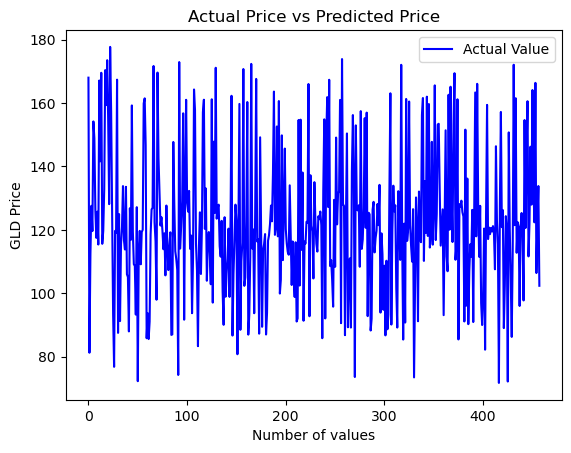

In [68]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
# plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

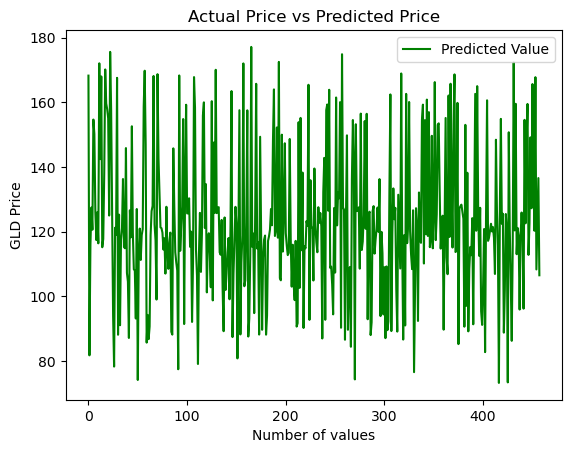

In [69]:
# plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [75]:
# np.where(X.columns=='SPX')[0][0]

In [76]:
# X

In [74]:
# def price():    
#     loc_index = np.where()
    
    
#     data = []
#     for i in similar_items:
#         item = []

#     x = np.zeros(len(X.columns))
#     x[0] = SPX
#     x[1] = USO
#     x[2] = SLV
#     x[3] = EUR/USD
#     if loc_index >= 0:
#         x[loc_index] = 1

#     return regressor.price([x])[0]

In [1]:
# price('0')